### Fraude de cartão de crédito
#### Fonte de Dados:
<ul>
<li>Os pagamentos digitais estão evoluindo, mas os criminosos cibernéticos também.</li><br>

<li> De acordo com o Data Breach Index, mais de 5 milhões de registros são roubados diariamente, uma estatística preocupante que mostra - a fraude ainda é muito comum tanto para pagamentos do tipo Cartão-Presente quanto Cartão-Não Presente.</li><br>

<li> No mundo digital de hoje, onde trilhões de transações com cartões acontecem por dia, a detecção de fraudes é um desafio</li>
    
</ul>

#### Explicação do das variáveis
<ul>
<li> <strong>distancefromhome</strong> - a distância de casa onde a transação aconteceu. </li> 

<li> <strong>distancefromlast_transaction</strong> - a distância da última transação aconteceu. </li>

<li> <strong>ratiotomedianpurchaseprice</strong> - Razão da transação do preço de compra para o preço de compra mediano. </li>

<li> <strong>repeat_retailer</strong> - É a transação que aconteceu do mesmo varejista. </li>

<li> <strong>used_chip</strong> - É a transação através de chip (cartão de crédito). </li>

<li> <strong>usedpinnumber</strong> - A transação aconteceu usando o número PIN. </li>

<li> <strong>online_order</strong> - A transação é um pedido online. </li>

<li> <strong>fraude</strong> - A transação é fraudulenta.</li>
</ul>

#### Subindo a base de dados:
Importação de bibliotecas

In [1]:
import pandas as pd # Para trabalhar com dados tabulares
from sklearn.model_selection import train_test_split #separação dos dados
from sklearn.neighbors import KNeighborsClassifier #modelo de machine learning classificação
from sklearn.metrics import accuracy_score #avaliação do modelo
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score #métrica de avaliação
from sklearn.preprocessing import StandardScaler, MinMaxScaler #Feature Engineer
import matplotlib.pyplot as plt #gráficos
import seaborn as sns #gráficos
import numpy as np #transformação dos dados
import warnings #remoção de avisos

In [2]:
df = pd.read_csv('card_transdata.csv', sep=',') 

In [3]:
df.head(5)

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [4]:
df.shape

(1000000, 8)

#### Tratando incosistências da base

In [5]:
df.isnull().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

#### Análise Exploratória dos Dados

In [6]:
df.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


#### Número de transações fraudulentas

In [7]:
df['fraud'].sum()

87403.0

In [8]:
total_fraudes = df['fraud'].sum()
total = df['fraud'].size

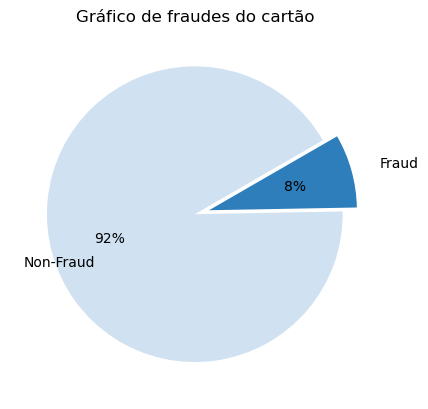

In [11]:
fig, ax = plt.subplots()
colors = plt.get_cmap('Blues')(np.linspace(0.2, 0.7, 2))
plt.pie(
    x=[total, total_fraudes], 
    labels=['Non-Fraud', 'Fraud'],
    autopct = "%.0f%%",
    explode= (0, 0.1),
    colors=colors, 
    radius=1, center=(4, 4),
    startangle=30, 
    labeldistance=1.2
)
plt.gca().set_aspect('equal')  # Garante que o gráfico de pizza seja circular
plt.gca().set_title("Gráfico de fraudes do cartão")

plt.show()

In [12]:
df_fraud = df[df['fraud'] == 1]

In [13]:
df_fraud.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
13,2.131956,56.372401,6.358667,1.0,0.0,0.0,1.0,1.0
24,3.803057,67.241081,1.872950,1.0,0.0,0.0,1.0,1.0
29,15.694986,175.989182,0.855623,1.0,0.0,0.0,1.0,1.0
35,26.711462,1.552008,4.603601,1.0,1.0,0.0,1.0,1.0
36,10.664474,1.565769,4.886521,1.0,0.0,0.0,1.0,1.0


In [14]:
df_fraud.describe().T

,count,mean,std,min,25%,50%,75%,max
distance_from_home,87403.0,66.261876,134.391608,0.025847,4.585729,15.454219,101.110104,10632.723672
distance_from_last_transaction,87403.0,12.712185,47.997697,0.000407,0.328199,1.157631,4.598504,2160.499922
ratio_to_median_purchase_price,87403.0,6.006323,5.564320,0.011966,3.500270,5.071294,7.331222,266.689692
repeat_retailer,87403.0,0.880119,0.324825,0.000000,1.000000,1.000000,1.000000,1.000000
used_chip,87403.0,0.256399,0.436647,0.000000,0.000000,0.000000,1.000000,1.000000
used_pin_number,87403.0,0.003123,0.055801,0.000000,0.000000,0.000000,0.000000,1.000000
online_order,87403.0,0.946318,0.225391,0.000000,1.000000,1.000000,1.000000,1.000000
fraud,87403.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000


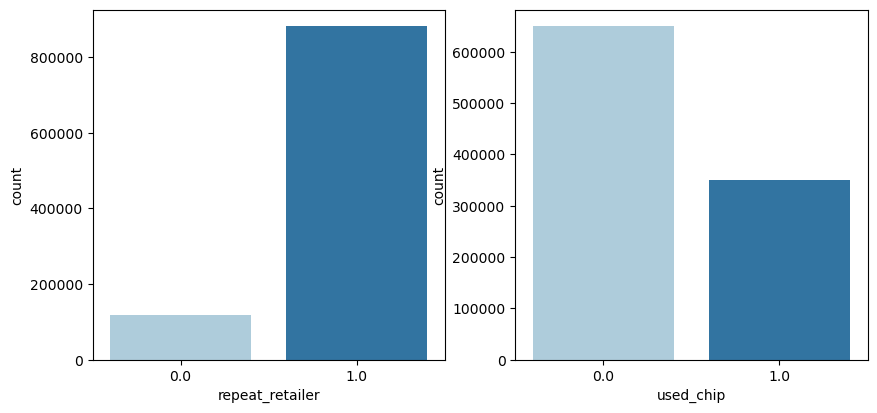

In [15]:
plt.figure(figsize = (10,10)) #Configurando o tamanho da visualização

plt.subplot(2,2,1)
sns.countplot(x = "repeat_retailer", palette = "Paired", data = df) #Aconteceu no mesmo varejista?

plt.subplot(2,2,2)
sns.countplot(x = "used_chip", palette = "Paired", data = df) #Uso de cartão de crédito?

# plt.subplot(2,2,3)
# sns.countplot(x = "used_pin_number", palette = "Paired", data = df) #Utilizou o mesmo número de PIN?

# plt.subplot(2,2,4)
# sns.countplot(x = "online_order", palette = "Paired", data = df) #Foi em uma compra online?

plt.show()

In [16]:
Colunas_Numericas = ["distance_from_home", "distance_from_last_transaction", "ratio_to_median_purchase_price"]

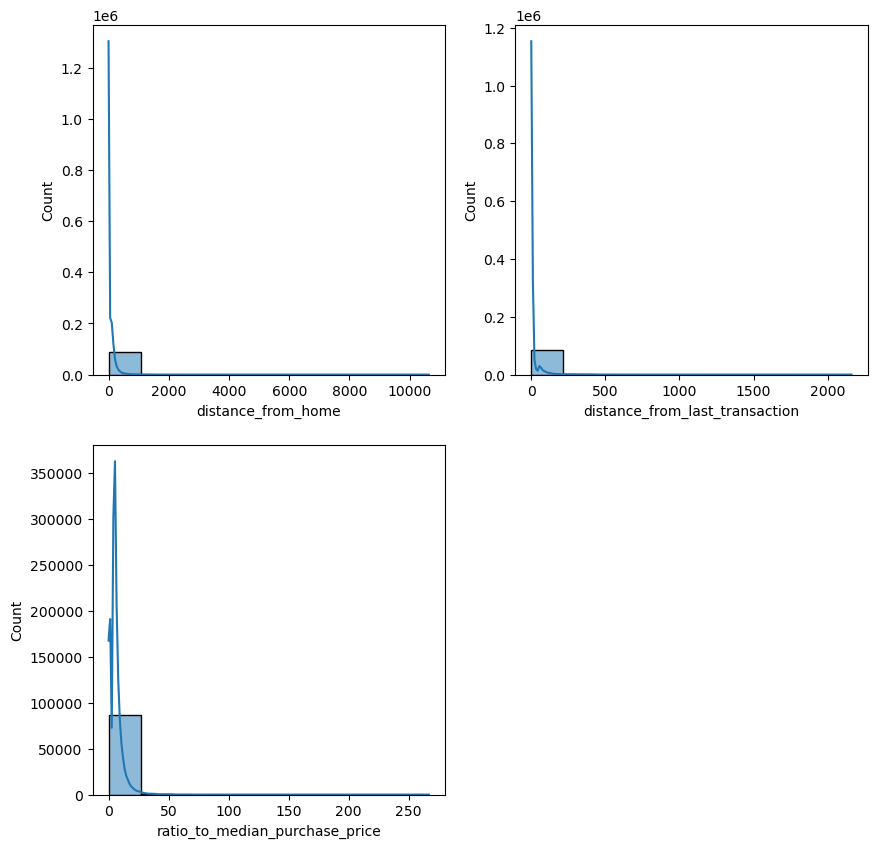

In [17]:
plt.figure(figsize=(10,10))
for i, colunas in enumerate(Colunas_Numericas):
    plt.subplot(2,2, i+1)
    sns.histplot(data=df_fraud, x=colunas, bins=10, kde=True)
plt.show()

#### Observação
Nos gráficos acima, vemos que a distribuição dos dados estão bastante assimétricas e concentrada na esquerda, portanto, seria útil uma transformação logaritmica para melhor visualização

In [22]:
cols = Colunas_Numericas

In [24]:
df_fraud_log = pd.DataFrame()
for i in cols:
    df_fraud_log = pd.concat([df_fraud_log, np.log10(df_fraud[i])], axis=1)

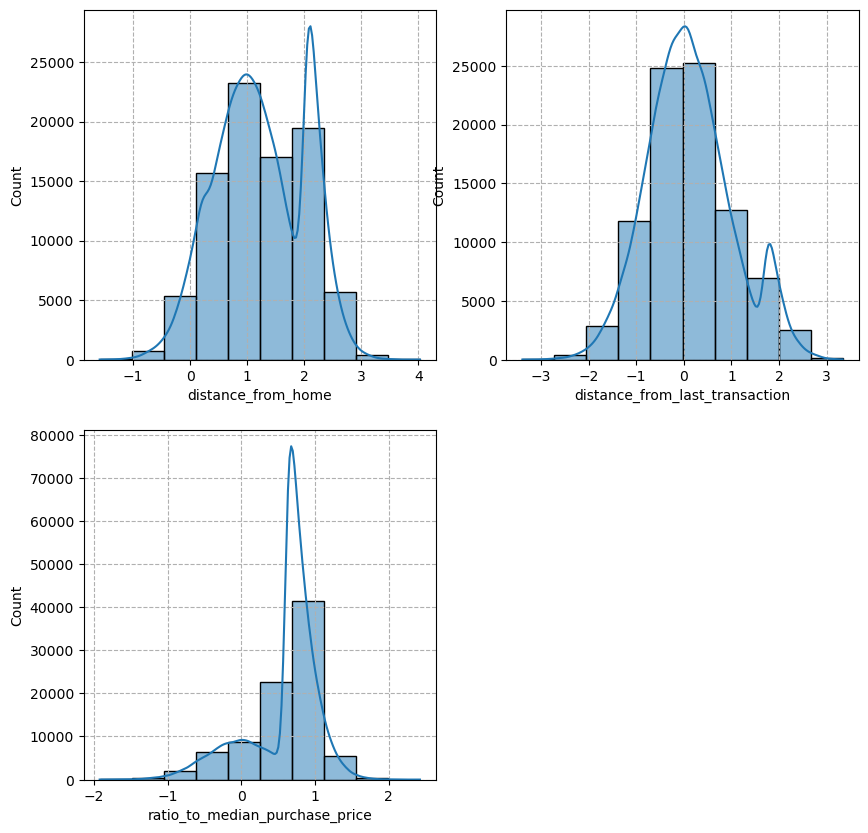

In [26]:
plt.figure(figsize=(10,10))
for i, colunas in enumerate(Colunas_Numericas):
    plt.subplot(2,2, i+1)
    sns.histplot(data=df_fraud_log, x=colunas, bins=10, kde=True)
    plt.grid(linestyle='--')
plt.show()

In [27]:
correlation_matrix = df.corr().round(2)

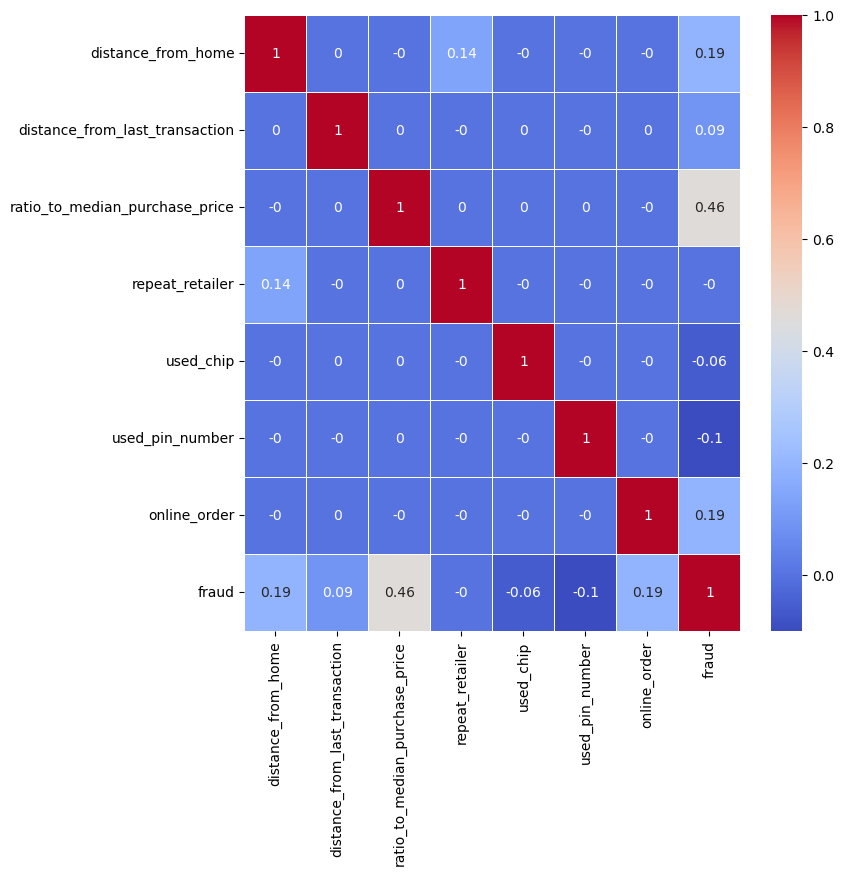

In [28]:
fig, ax = plt.subplots(figsize=(8,8))    

sns.heatmap(data=correlation_matrix, cmap='coolwarm', annot=True, linewidths=0.5, ax=ax )

plt.show()

#### Selecionando as colunas com maiores correlações com a variável target 'fraud'

In [29]:
selected_cols = correlation_matrix['fraud'].sort_values(ascending=False)[1:4].index.to_list()
selected_cols

['ratio_to_median_purchase_price', 'distance_from_home', 'online_order']

In [30]:
df[selected_cols].head()

,ratio_to_median_purchase_price,distance_from_home,online_order
0,1.945940,57.877857,0.0
1,1.294219,10.829943,0.0
2,0.427715,5.091079,1.0
3,0.362663,2.247564,1.0
4,2.222767,44.190936,1.0


### Criação do modelo de Machine Learming

#### Separação da base de treino e teste

In [31]:
x=df[selected_cols]
y=df['fraud']

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, stratify=y, random_state=7)

In [33]:
scaler = MinMaxScaler()
scaler.fit(x_train)

MinMaxScaler()

In [34]:
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [35]:
x_train_scaled

array([[1.50558382e-03, 9.96388717e-05, 0.00000000e+00],
       [7.15773571e-03, 1.54952788e-03, 0.00000000e+00],
       [1.11411604e-02, 1.71017218e-04, 1.00000000e+00],
       ...,
       [7.30259599e-03, 3.53676362e-04, 0.00000000e+00],
       [8.64052299e-02, 5.27141795e-04, 0.00000000e+00],
       [3.40812710e-02, 9.41482438e-04, 0.00000000e+00]])

In [36]:
x_scaled_df = pd.DataFrame(x_train_scaled, columns=selected_cols)
x_scaled_df

,ratio_to_median_purchase_price,distance_from_home,online_order
0,0.001506,0.000100,0.0
1,0.007158,0.001550,0.0
2,0.011141,0.000171,1.0
3,0.002209,0.019061,0.0
4,0.015900,0.006868,1.0
...,...,...,...
699995,0.008014,0.006555,0.0
699996,0.017204,0.012592,1.0
699997,0.007303,0.000354,0.0
699998,0.086405,0.000527,0.0


In [69]:
acc_anterior = 0
k_value=0
error = []
for i in range(1,11):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train_scaled, y_train)
    y_pred = knn.predict(x_test_scaled)
    acc_atual = accuracy_score(y_test, y_pred)
    error.append(np.mean(y_pred != y_test))
    print(i, acc_atual)
    if acc_atual > acc_anterior:
        k_value=i
        acc_anterior = acc_atual

1 0.9601266666666667
2 0.9592533333333333
3 0.9693766666666667
4 0.9672533333333333
5 0.9710733333333333
6 0.9697066666666667
7 0.97152
8 0.97062
9 0.9715833333333334
10 0.97093


#### O melhor valor para parâmetro 'n_neighbors' é 9, conforme a variável k_value indica

In [68]:
k_value

9

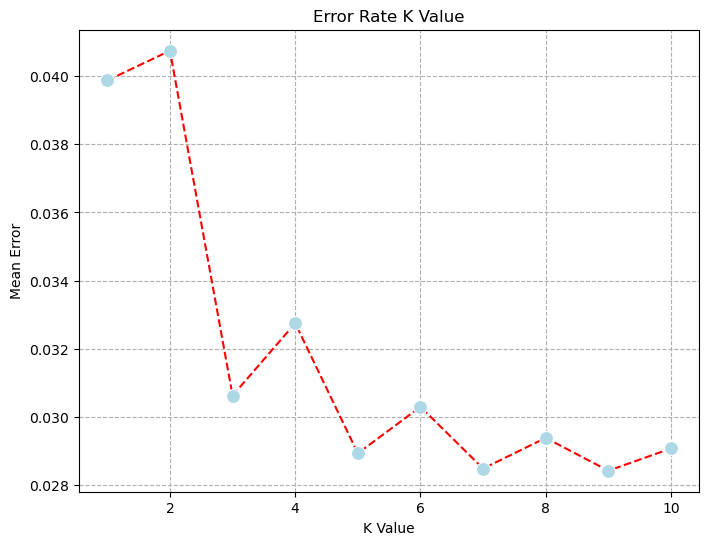

In [61]:
fig = plt.figure(figsize=(8,6))
sns.lineplot(
    x=list(range(1,len(error)+1)), 
    y=error, 
    color='r', 
    marker='o', 
    linestyle='--', 
    markerfacecolor='lightblue', 
    markersize=10)
plt.grid(linestyle='--')
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
plt.show()             

### Analisando os resultados

#### Medindo a acurácia do modelo

In [62]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(x_train_scaled, y_train)
y_pred = knn.predict(x_test_scaled)
acc = accuracy_score(y_test, y_pred)
acc

0.9715833333333334